<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/4_2_SVM_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVC with linear kernel
LinearSVC (linear kernel)
[[49  1  0]
 [ 2 30 18]
 [ 0  9 41]]
SVC with RBF kernel
[[50  0  0]
 [ 0 37 13]
 [ 0 13 37]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC with polynomial (degree 3) kernel
[[50  0  0]
 [ 0 38 12]
 [ 0 16 34]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


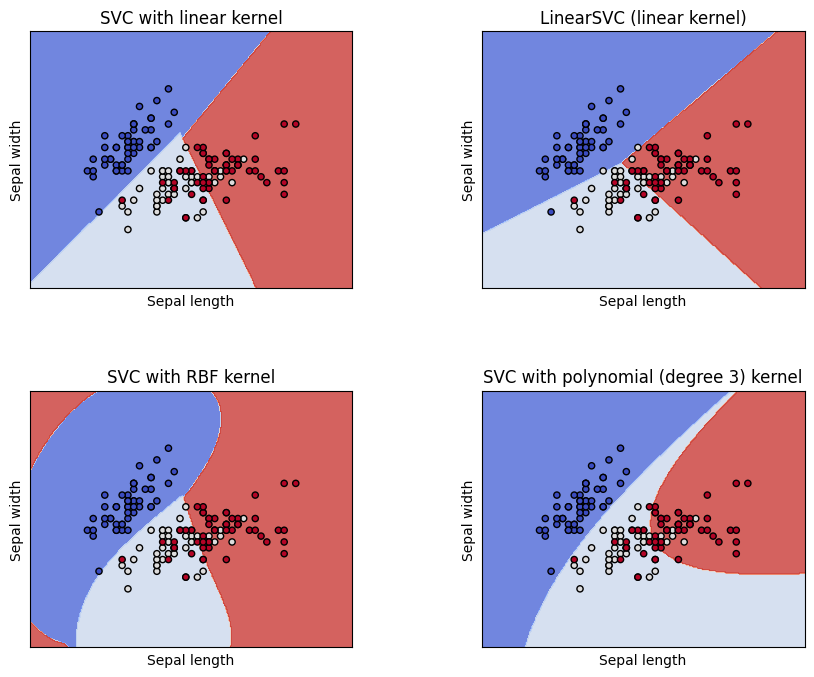

In [26]:
#출처:https://todayisbetterthanyesterday.tistory.com/32
# 필요 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1  # SVM의 정규화 파라미터

# SVC with linear kernel
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)
y_pred = clf.predict(X)
print("SVC with linear kernel")
print(confusion_matrix(y, y_pred))
"""
confusion_matrix(y, y_pred)는 모델의 성능을 평가하기 위한 지표로서,
분류 문제에서 모델이 예측한 클래스와 실제 클래스 간의 혼동 정도를 나타내는 행렬입니다.
이는 scikit-learn 라이브러리의 metrics 모듈에서 제공됩니다.
혼동 행렬(confusion matrix)은 모델의 예측 결과를 비교하여 모델의 정확도와 각 클래스의
예측 성능을 분석하는 데 유용합니다.
"""

# LinearSVC
clf = svm.LinearSVC(C=C, max_iter=10000)
clf.fit(X, y)
y_pred = clf.predict(X)
print("LinearSVC (linear kernel)")
print(confusion_matrix(y, y_pred))

# SVC with RBF kernel
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)
y_pred = clf.predict(X)
print("SVC with RBF kernel")
print(confusion_matrix(y, y_pred))

# SVC with polynomial kernel
clf = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf.fit(X, y)
y_pred = clf.predict(X)
print("SVC with polynomial (degree 3) kernel")
print(confusion_matrix(y, y_pred))

# 함수 정의
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 모델 정의 및 피팅
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = [clf.fit(X, y) for clf in models]  # 각 모델을 피팅

# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# plot 그리기
fig, sub = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
